In [1]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt

from sklearn import linear_model
import statsmodels.formula.api as sm
import numpy as np
import math

from sklearn.cluster import KMeans 
from sklearn.mixture import GaussianMixture
%matplotlib inline

In [2]:
# Read in data
raw_df = pd.read_csv('../data/CollegeScorecard_Raw_Data/MERGED2016_17_PP.csv',
                     header=0,
                     low_memory=False)

# raw_df = raw_df.append(pd.read_csv('../data/CollegeScorecard_Raw_Data/MERGED2015_16_PP.csv',
#                      header=0,
#                      low_memory=False))

# raw_df = raw_df.append(pd.read_csv('../data/CollegeScorecard_Raw_Data/MERGED2014_15_PP.csv',
#                      header=0,
#                      low_memory=False))

# raw_df = raw_df.append(pd.read_csv('../data/CollegeScorecard_Raw_Data/MERGED2013_14_PP.csv',
#                      header=0,
#                      low_memory=False))

In [3]:
div_adm = ["UNITID", "INSTNM", "ADM_RATE","SAT_AVG", 
           "UGDS", "UGDS_WHITE",
           "UGDS_BLACK", "UGDS_HISP",
           "UGDS_ASIAN"]

# Remove majority/historic diverse schools
# Select demographics of interest
print(len(raw_df))
names = raw_df[(raw_df["HBCU"] == 1) | (raw_df["PBI"] == 1) | 
                  (raw_df["ANNHI"] == 1) | (raw_df["TRIBAL"] == 1) |
                  (raw_df["AANAPII"] == 1) | (raw_df["HSI"] == 1)]
names = names[['UNITID']]

filtered = raw_df[~raw_df['UNITID'].isin(names['UNITID'])]

print(len(filtered))

df = filtered[div_adm]
df = df.round(2).dropna()

#df['buck_adm'] = pd.cut(df['ADM_RATE'], bins=10, precision=2)
#df['buck_sat'] = pd.cut(df['SAT_AVG'], bins=15, precision=0)
#df = df[['buck_adm', 'buck_sat', 'UGDS_BLACK', 'UGDS_WHITE', 'UGDS_ASIAN', 'UGDS_HISP']].dropna()
print(len(df))

7175
6442
1093


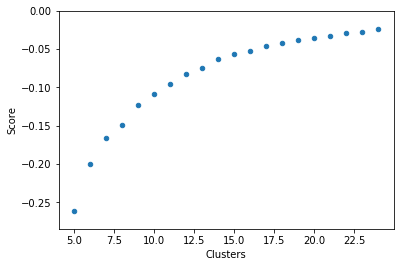

In [4]:
data = df[["ADM_RATE","SAT_AVG", "UGDS_WHITE", "UGDS_BLACK", "UGDS_HISP","UGDS_ASIAN"]]
labelled = df[["INSTNM","ADM_RATE","SAT_AVG", "UGDS_WHITE", "UGDS_BLACK", "UGDS_HISP","UGDS_ASIAN"]]
data = data[data["ADM_RATE"] < 0.25]
labelled = labelled[labelled["ADM_RATE"] < 0.25]

data = data[["UGDS_WHITE", "UGDS_BLACK", "UGDS_HISP","UGDS_ASIAN"]]
labelled = labelled[["INSTNM","UGDS_WHITE", "UGDS_BLACK", "UGDS_HISP","UGDS_ASIAN"]]

values = []
for i in range(5, 25):
    kmeans = KMeans(n_clusters=i, random_state=0)

    kmeans.fit(data)
    
    values.append([i, kmeans.score(data)])


values = np.array(values)
#values = np.reshape(values, (20,2))

v = pd.DataFrame({'Clusters' : values[:,0], 'Score' : values[:,1]})

v.plot.scatter(x='Clusters', y='Score')

In [5]:
num_clusters = 8
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

kmeans.fit(data)

#plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [6]:
clusters = [[] for i in range(0,num_clusters)]
for i,k in enumerate(kmeans.labels_):
    clusters[k].append(labelled.values[i][0])
    
for r in clusters:
    print(str(r) + '\n')

['Oak Hills Christian College', 'United States Merchant Marine Academy', 'Reading Hospital School of Health Sciences', 'Washington and Lee University']

['Claremont McKenna College', 'Pomona College', 'University of Southern California', 'Yale University', 'University of Chicago', 'Northwestern University', 'Amherst College', 'Harvard University', 'Princeton University', 'Columbia University in the City of New York', 'Cornell University', 'Duke University', 'University of Pennsylvania', 'Swarthmore College', 'Brown University']

['University of Notre Dame', 'Colby College', 'Carleton College', 'Davidson College', 'Haverford College', 'Middlebury College']

['California Institute of Technology', 'University of California-Berkeley', 'Carnegie Mellon University']

['Dallas Christian College', 'Southwestern Assemblies of God University']

['Alice Lloyd College', 'College of the Ozarks']

['Georgetown University', 'Grinnell College', 'Tufts University', 'Williams College', 'Washington Unive